## Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
FOLDER_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/'

MODELS_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/Models'

GOOGLE_FOLDER_PATH = os.path.join('drive', 'My Drive', FOLDER_PATH)
GOOGLE_MODELS_PATH = os.path.join('drive', 'My Drive', MODELS_PATH)
 
print(os.listdir(GOOGLE_MODELS_PATH))
print(os.listdir(GOOGLE_FOLDER_PATH))



['ComputerVision.ipynb']
['Models', 'CW_Dataset', 'test_function.ipynb']


## Reading the dataset

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
CODE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'Code')
sys.path.append(CODE_PATH)


In [ ]:
import cv2
from skimage import img_as_ubyte, io, color
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'CW_Dataset')

def load_images_from_folder(path, label_list=None):
  images = []
  labels = []
  img_labels = {}
  if label_list is None:
    folder_names = [folder for folder in sorted(os.listdir(path)) if not folder.startswith('README')]
    print('folder_names', folder_names)
  else:
    folder_names = [folder for folder in sorted(os.listdir(path)) if folder in label_list.endswith('.jpg')]  
  
  for folder in folder_names:
    file_names = [file for file in sorted(os.listdir(os.path.join(path, folder)))]
    print('file_names', file_names)
    for file in file_names:

      if file.endswith('.txt'):
        labels_rd = np.loadtxt(os.path.join(path, folder, file), delimiter=' ', usecols=(1)).tolist()

        [labels.append(label) for label in labels_rd]
        print(labels[:5], len(labels))
        
        print(folder, file, labels)
      else:
        rep_str = '(1)'
        if rep_str not in file:
          images.append(io.imread(os.path.join(path, folder, file)))
        print(folder, file)
  return images, labels

X, y = load_images_from_folder(DATASET_PATH)



Se han truncado las últimas 5000 líneas del flujo de salida.
train train_07288_aligned.jpg
train train_07289_aligned.jpg
train train_07290_aligned.jpg
train train_07291_aligned.jpg
train train_07292_aligned.jpg
train train_07293_aligned.jpg
train train_07294_aligned.jpg
train train_07295_aligned.jpg
train train_07296_aligned.jpg
train train_07297_aligned.jpg
train train_07298_aligned.jpg
train train_07299_aligned.jpg
train train_07300_aligned.jpg
train train_07301_aligned.jpg
train train_07302_aligned.jpg
train train_07303_aligned (1).jpg
train train_07303_aligned.jpg
train train_07304_aligned.jpg
train train_07305_aligned.jpg
train train_07306_aligned.jpg
train train_07307_aligned.jpg
train train_07308_aligned.jpg
train train_07309_aligned.jpg
train train_07310_aligned.jpg
train train_07311_aligned.jpg
train train_07312_aligned.jpg
train train_07313_aligned.jpg
train train_07314_aligned.jpg
train train_07315_aligned.jpg
train train_07316_aligned.jpg
train train_07317_aligned.jpg
train

## Introduction

The RAF dataset contains 15339 aligned facial color images containing expressions and labels for the images, the labels are encoded using ordinal encoding for every emotion. 

### Data
Images are named in the format of "train_XXXXX_aligned.jpg" / "test_XXXX_aligned.jpg".
Images are first roughly aligned using similarity transformation according to the two eye locations and the center of mouth.

Images are then resized to 100*100

#### Label explanation:
1. Surprise<p>
2. Fear<p>
3. Disgust<p>
4. Happiness<p>
5. Sadness
6. Anger
7. Neutral





(15339, 100, 100, 3) (15339,)


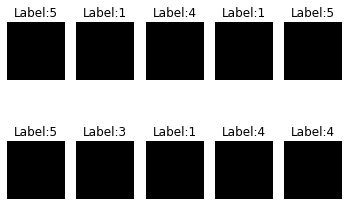

In [ ]:

def convert_to_numpy(images, labels):
  """Converts the images to a numpy array""" 
  
  data = np.asarray(images)
  lb = np.asarray(labels)
  return data, lb

X, y = convert_to_numpy(X, y)


X = X / 255.
y = y.astype(int)

print(X.shape, y.shape)

#def print_images()
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
ax = axs.ravel()
for i in range(10):
  ax[i].imshow(X[i, :, :, :])
  ax[i].set_title(f'Label:{y[i]}')
  ax[i].set_axis_off()
plt.show()



In [ ]:
from skimage import img_as_ubyte, color
from skimage.transform import rescale, resize

#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
#                       anti_aliasing=True)
#X = X.reshape(-1, 100*100*3)


X = img_as_ubyte(color.rgb2gray(X))
X = X.reshape(-1, 100*100)
X.shape


(15339, 10000)

In [ ]:
print(X.dtype, y.dtype)
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


uint8 int64
TRAIN: [ 2191  2206  2217 ... 15336 15337 15338] TEST: [   0    1    2 ... 3484 3511 3514]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 2191  2206  2217 ... 13414 13415 13416]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 5171  5172  5173 ... 14055 14056 14057]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 6762  6763  6767 ... 14696 14697 14698]
TRAIN: [    0     1     2 ... 14696 14697 14698] TEST: [ 9498  9499  9500 ... 15336 15337 15338]


In [ ]:
print('X_train shape =', X_train.shape)
print('y_train shape =', y_train.shape)

X_train shape = (12272, 10000)
y_train shape = (12272,)


In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.utils.fixes import loguniform


params_distribs = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
 'class_weight':['balanced', None]}


svg = SVC()
rndSearch = RandomizedSearchCV(svg, params_distribs, n_iter=100, random_state=42, verbose=2)
 
sub_size = 1000
rndSearch.fit(X_train[:sub_size, :], y_train[:sub_size])
#svg.fit(X_train[:50, :], y_train[:50])
print(rndSearch.best_params_)


#predicted_new = rndSearch.predict(hist_array)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid, total=  14.9s
[CV] C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV]  C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid, total=  14.4s
[CV] C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid 
[CV]  C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid, total=  14.0s
[CV] C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid 
[CV]  C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid, total=  14.4s
[CV] C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid 
[CV]  C=13.292918943162162, class_weight=balanced, gamma=0.00015255793090045733, kernel=sigmoid, total=  14.6s
[CV] C=62.51373574521747, class_weight=balanced, gamma=0.0002791468637452872, kernel=poly 
[CV]  C=62.51373574521747, class_weight=balanced, gamma=0.0002791468637452872, kernel=poly, total=  19.6s
[CV] C=62.51373574521747, class_weight=balanced, gamma=0.00027914686374

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 140.7min finished


{'C': 34.89018845491386, 'class_weight': None, 'gamma': 0.0002929293535977796, 'kernel': 'rbf'}


In [ ]:
from sklearn.utils import shuffle
from sklearn import metrics

predicted = rndSearch.predict(X_test[:sub_size, :])
print(f"""Classification report for classifier {rndSearch}:
      {metrics.classification_report(y_test[:sub_size], predicted)}\n""")


Classification report for classifier RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd534aa3550>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd53d369f50>,
                                        'kernel': ['rbf', 'linear', 'poly',
                                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

SVM without using any feature descriptor did not as well, it gave 0.68% accuracy. 

Stratified K Fold was used to cross validate the results, the data was splitted into 5 folds. 

To train the model randomised gridsearch was used:
C was chosen from a range of params from 1e-4 to 1e-3. 
gamma was chosen from a range of params from 1e-4 to 1e-3. 
the kerner was chosen from linear, rbf, poly and sigmoid

The parameters were choosen randomly from a normal distribution.

the best parameters found were 'C': 34.89018845491386, 'gamma': 0.0002929293535977796, 'kernel': 'rbf'.

The training was perform by using a sample of 2000 images, after the training, we found that there was found that class seven was missing.

Confusion matrix:
[[ 29   0   4 101  24   5]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 79   3  17 349  85  28]
 [ 19   1   5 147  22   7]
 [ 14   0   0  54   7   0]]


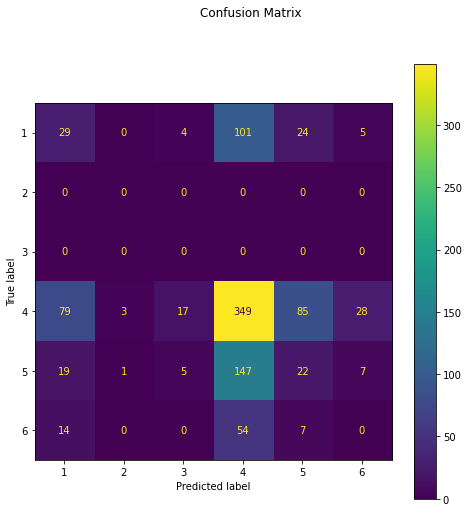

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
cm = metrics.plot_confusion_matrix(rndSearch, X_train[:sub_size, :], y_test[:sub_size], values_format = 'd', ax=ax)
cm.figure_.suptitle("Confusion Matrix")

print(f'Confusion matrix:\n{cm.confusion_matrix}')

In [ ]:
if 7 in y_train[:2500]:
  print(True)
else:
  print(False)

rndSearch.classes_

True


array([1, 2, 3, 4, 5, 6])

In [ ]:
from joblib import dump, load


SAVE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'svc_alone.joblib')
dump(rndSearch, SAVE_PATH) 
load = load(SAVE_PATH)
